In [1]:
#dataset: Amazon Products Sales Dataset 2023

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [3]:
# Assuming the delimiter is a semicolon (;)
df = pd.read_csv(r"D:\Data Science\My All Project\Amazon Product dataset   Analysis (2023 )\Amazon_Products_Sales_Dataset_2023.csv")

In [4]:
df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,Unnamed: 0
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990",NaN
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990",NaN
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990",NaN
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4,69,"₹37,990","₹68,990",NaN
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790",NaN


### Data Pre-processing

In [5]:
df.columns

Index(['name', 'main_category', 'sub_category', 'image', 'link', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price', 'Unnamed: 0'],
      dtype='object')

In [6]:
#drop some coloum
df.drop(['image', 'link', 'Unnamed: 0'], axis=1, inplace=True) 

In [7]:
df.columns #again Chek coloum

Index(['name', 'main_category', 'sub_category', 'ratings', 'no_of_ratings',
       'discount_price', 'actual_price'],
      dtype='object')

In [8]:
df.isnull().sum()

name                   0
main_category          0
sub_category           0
ratings           332399
no_of_ratings     332399
discount_price    115687
actual_price       33968
dtype: int64

In [9]:

df = df.dropna(subset=['actual_price']) #remove 'actual_price' null value



In [10]:
# Define a function to extract the numeric value




def extract_numeric(text):
    match = re.search(r'₹([\d,]+)', str(text))
    if match:
        numeric_value = match.group(1).replace(',', '')
        return int(numeric_value)
    return None

# Apply the function to the DataFrame column
df['discount_price'] = df['discount_price'].apply(extract_numeric)




def extract_numeric(text):
    match = re.search(r'₹([\d,]+)', str(text))
    if match:
        numeric_value = match.group(1).replace(',', '')
        return int(numeric_value)
    return None

# Apply the function to the DataFrame column
df['actual_price'] = df['actual_price'].apply(extract_numeric)





In [11]:
#Fill null value discount_price using median

med = df['discount_price'].median()
print(med)

df['discount_price'] = df['discount_price'].fillna(med)


694.0


In [12]:
#Fill null value 'no_of_ratings' using mode

mod1=df['no_of_ratings'].mode()

mod1
df['no_of_ratings'] = df['no_of_ratings'].fillna(mod1)[1]

In [13]:
#Fill null value 'ratings' using mode
mod2=df['ratings'].mode()

df['ratings'] = df['ratings'].fillna(mod2)[1]

In [14]:
df.isnull().sum() #chek any null value 

name              0
main_category     0
sub_category      0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
dtype: int64

In [15]:
df.shape

(1014607, 7)

In [16]:
df.dtypes


name               object
main_category      object
sub_category       object
ratings            object
no_of_ratings      object
discount_price    float64
actual_price        int64
dtype: object

In [17]:
# Convert "ratings" column to integers
df['ratings'] = df['ratings'].astype(float)

# Remove commas and convert "no_of_ratings" column to integers
df['no_of_ratings'] = df['no_of_ratings'].str.replace(',', '').astype(int)

In [18]:
df.dtypes

name               object
main_category      object
sub_category       object
ratings           float64
no_of_ratings       int32
discount_price    float64
actual_price        int64
dtype: object

### EDA Analysis

In [19]:
columns_to_correlate = ['discount_price', 'actual_price']

# Calculate the correlation coefficients
correlation_matrix = df[columns_to_correlate].corr()

# Show the output
print(correlation_matrix)

                discount_price  actual_price
discount_price        1.000000      0.000554
actual_price          0.000554      1.000000


In [20]:


# Calculate the correlation coefficients
correlation_matrix = df[columns_to_correlate].describe()

# Show the output
print(correlation_matrix)

       discount_price  actual_price
count    1.014607e+06  1.014607e+06
mean     2.489725e+03  2.410906e+04
std      9.037429e+03  1.389982e+07
min      8.000000e+00  0.000000e+00
25%      3.990000e+02  9.900000e+02
50%      6.940000e+02  1.599000e+03
75%      1.299000e+03  3.000000e+03
max      1.249990e+06  9.900000e+09


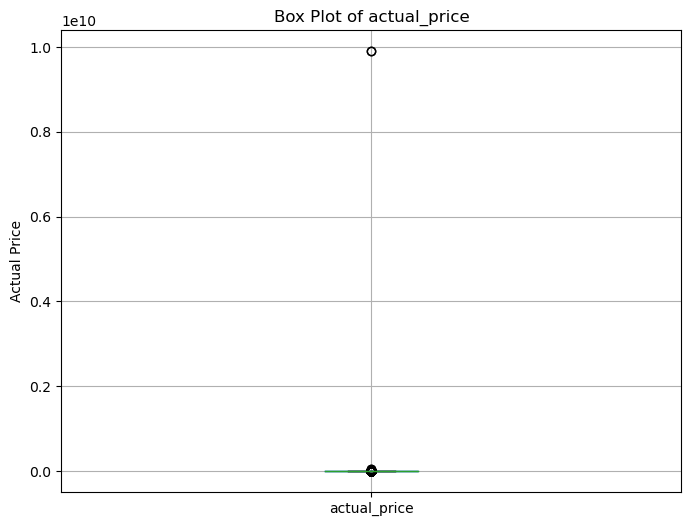

In [21]:
# Create a box plot for the "actual_price" column
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
df.boxplot(column="actual_price")
plt.title("Box Plot of actual_price")
plt.ylabel("Actual Price")
plt.show()

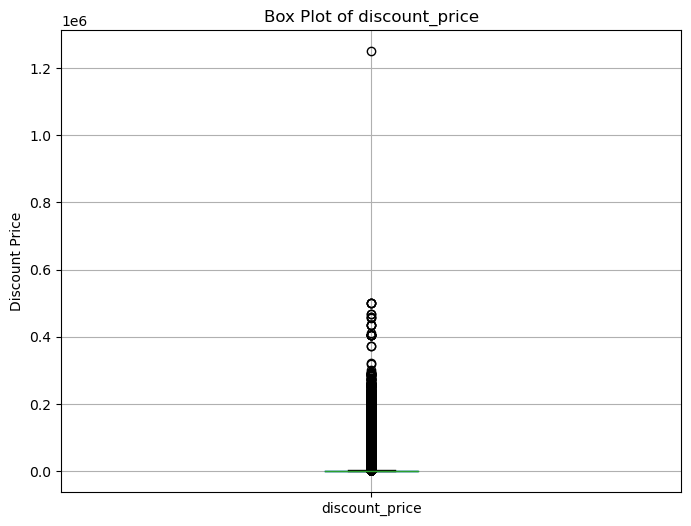

In [22]:
# Create a box plot for the "actual_price" column
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
df.boxplot(column="discount_price")
plt.title("Box Plot of discount_price")
plt.ylabel("Discount Price")
plt.show()

In [23]:
df.head()

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.2,2948,32999.0,58990
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.2,2948,46490.0,75990
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,4.2,2948,34490.0,61990
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.2,2948,37990.0,68990
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,4.2,2948,34490.0,67790


In [24]:
category_subcategory_counts = df.groupby('main_category')['main_category'].value_counts().sum()



In [25]:
print(category_subcategory_counts)

1014607


In [36]:
category_subcategory_counts = df.groupby('main_category')['sub_category'].value_counts().sort_values(ascending=False)

for main_category, sub_category_count in category_subcategory_counts.groupby(level=0):
    print(f"{main_category} {sub_category_count.sum()}")
    for sub_category, count in sub_category_count.items():
        print(f"{sub_category} {count}")


accessories 203662
('accessories', 'Bags & Luggage') 38000
('accessories', 'Fashion & Silver Jewellery') 37772
('accessories', 'Jewellery') 37654
('accessories', 'Handbags & Clutches') 37592
('accessories', 'Gold & Diamond Jewellery') 31486
('accessories', 'Watches') 18680
('accessories', 'Sunglasses') 2478
appliances 61499
('appliances', 'Kitchen & Home Appliances') 19006
('appliances', 'All Appliances') 18970
('appliances', 'Heating & Cooling Appliances') 18092
('appliances', 'Refrigerators') 3278
('appliances', 'Washing Machines') 1153
('appliances', 'Air Conditioners') 1000
bags & luggage 15100
('bags & luggage', 'Rucksacks') 4168
('bags & luggage', 'Backpacks') 4000
('bags & luggage', 'Suitcases & Trolley Bags') 2068
('bags & luggage', 'Wallets') 1975
('bags & luggage', 'Travel Accessories') 1802
('bags & luggage', 'Travel Duffles') 1087
beauty & health 19750
('beauty & health', 'Make-up') 5218
('beauty & health', 'Beauty & Grooming') 3830
('beauty & health', 'Diet & Nutrition') 2

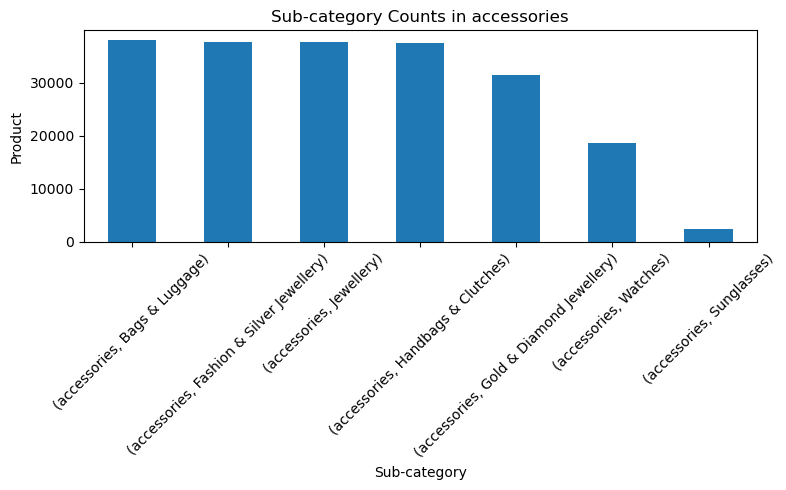

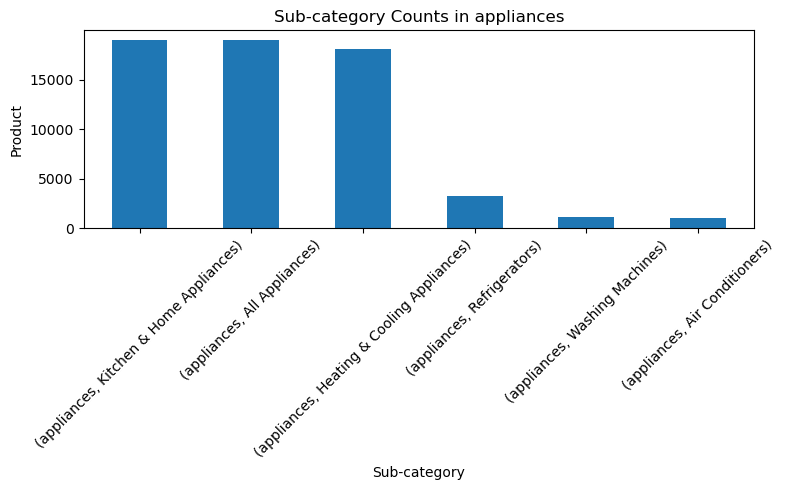

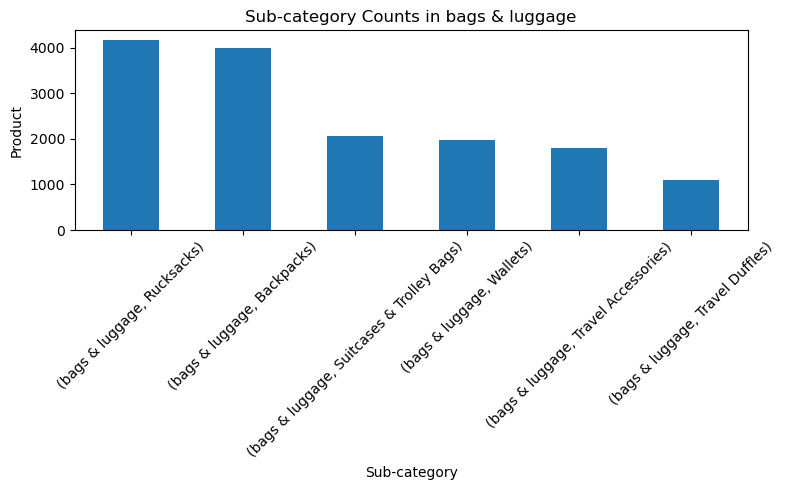

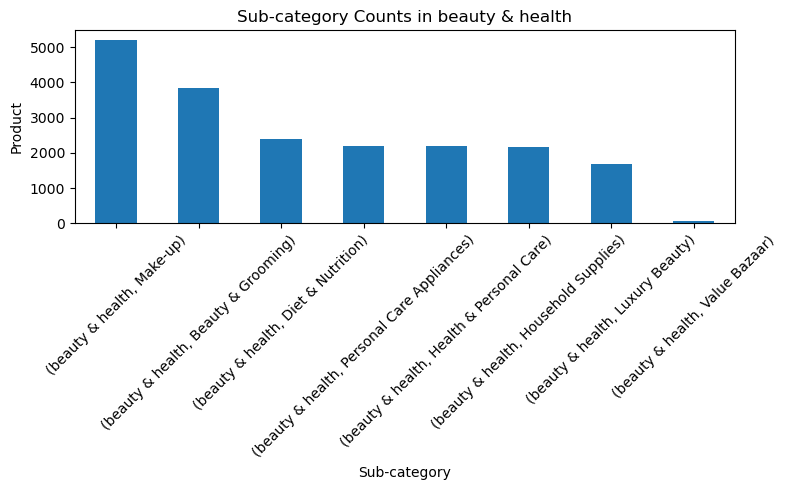

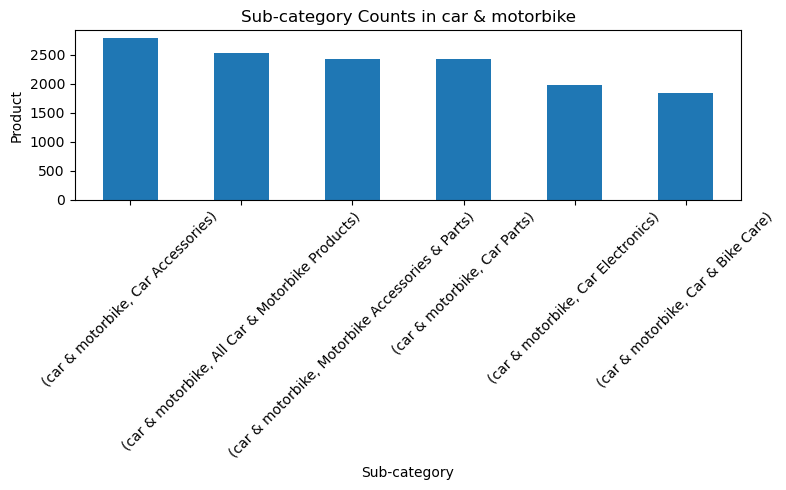

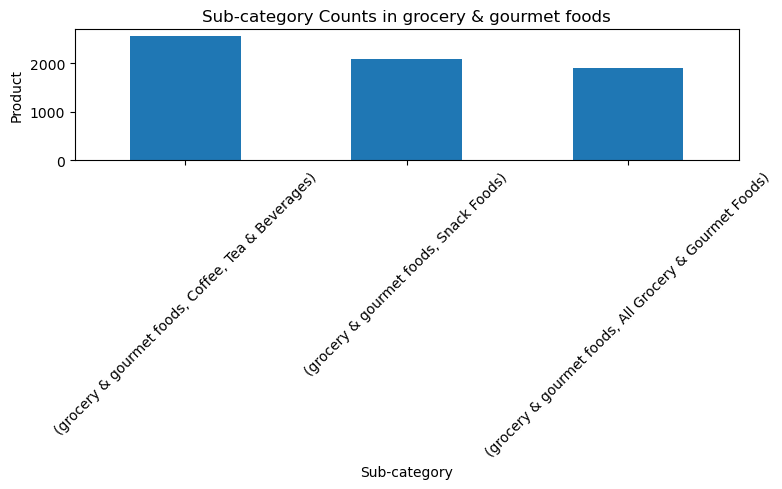

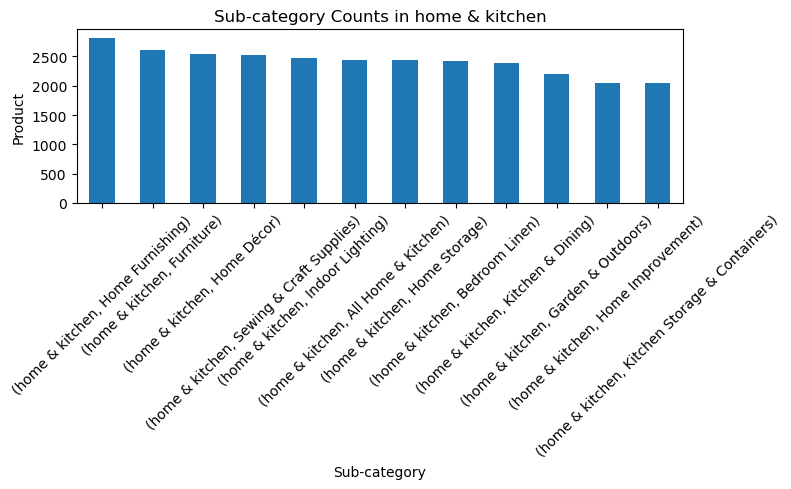

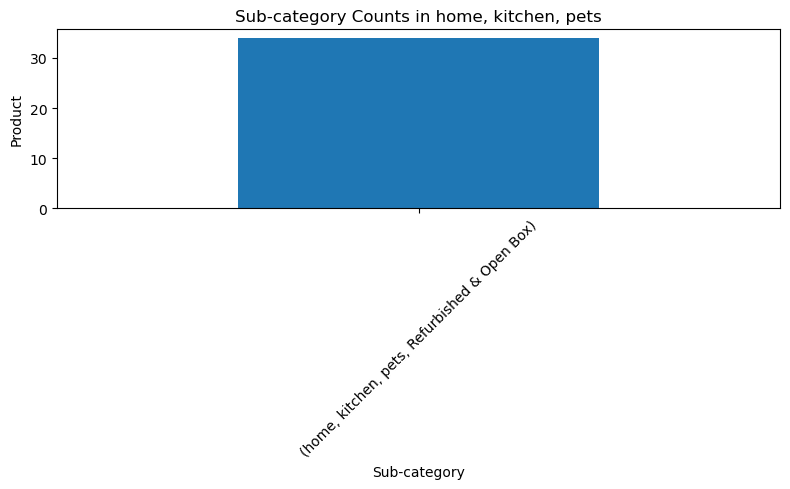

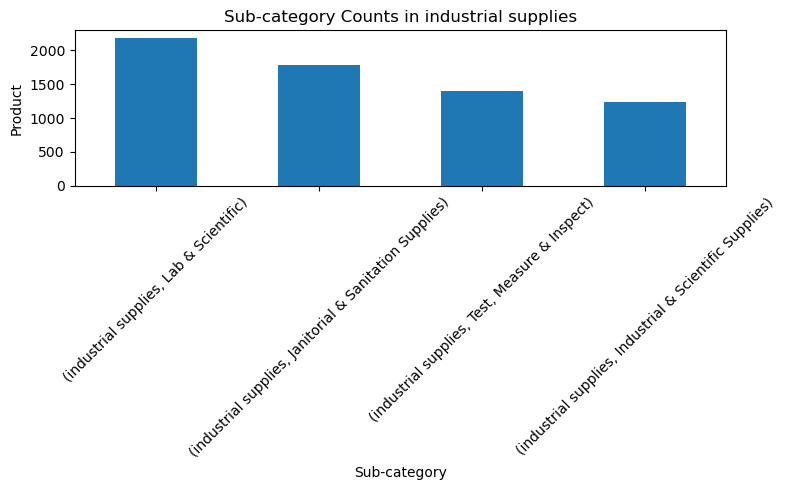

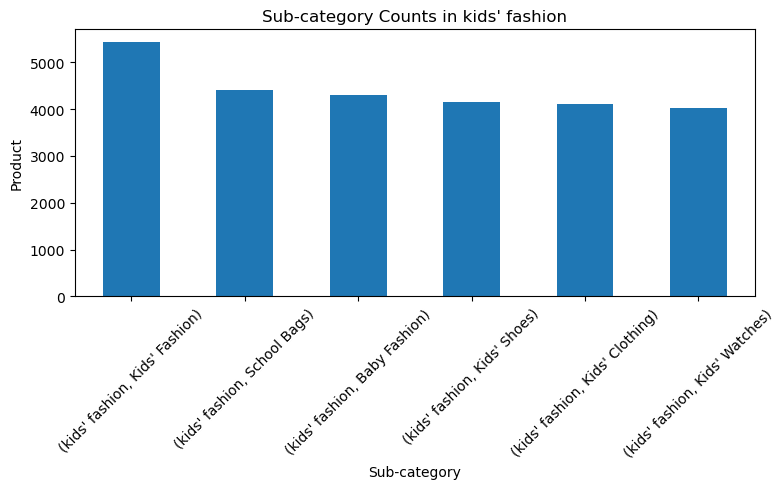

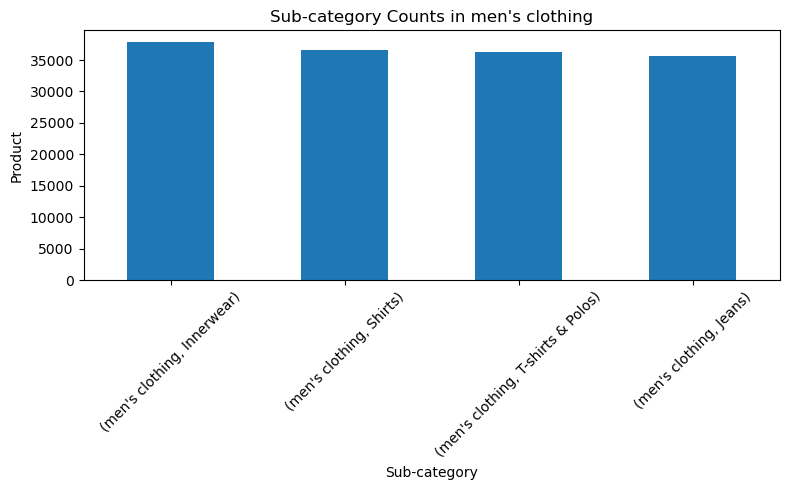

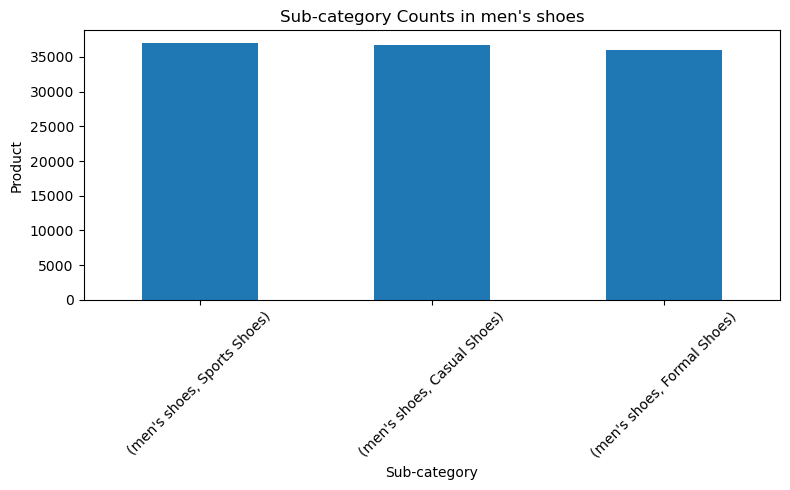

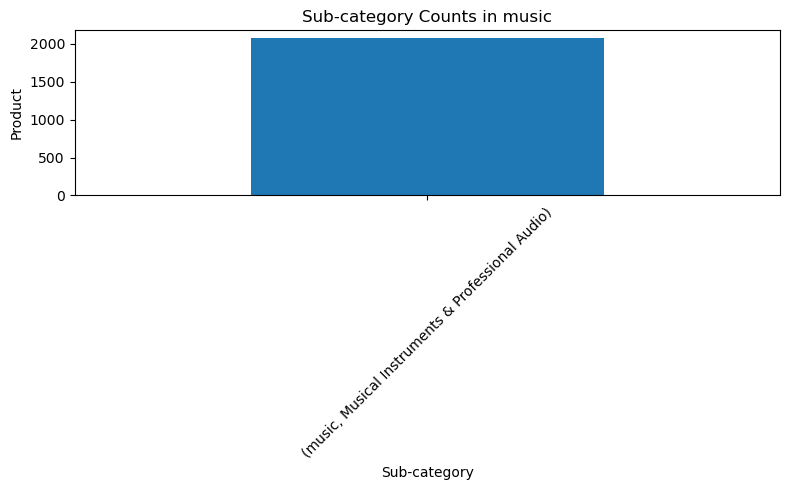

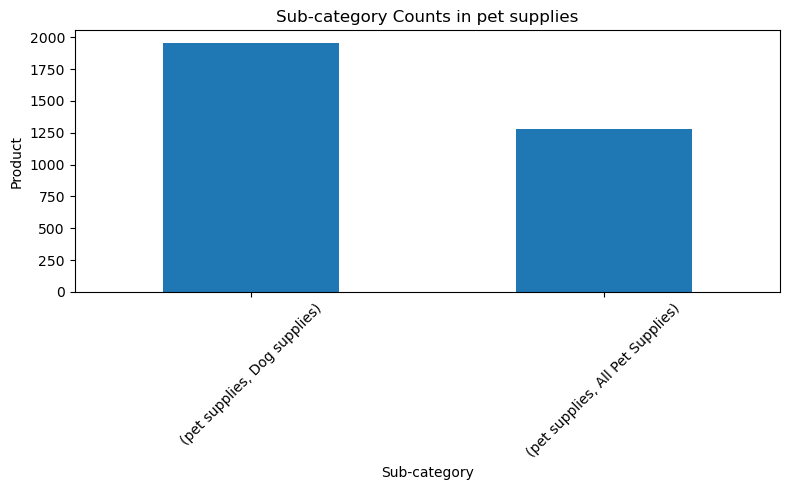

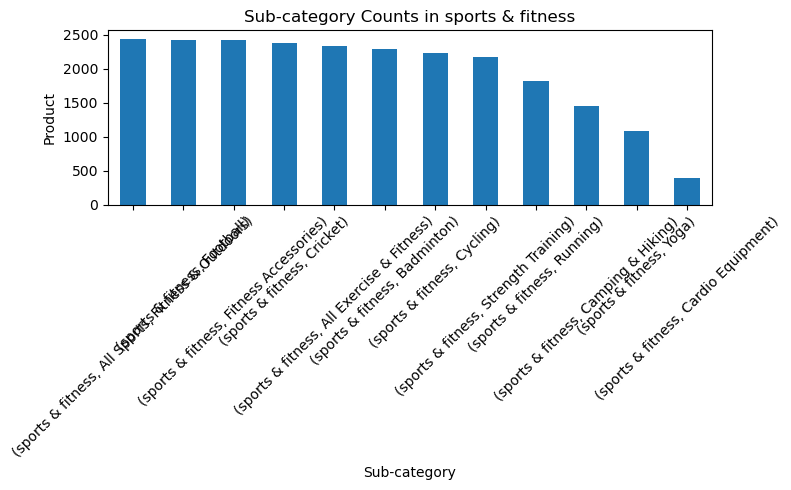

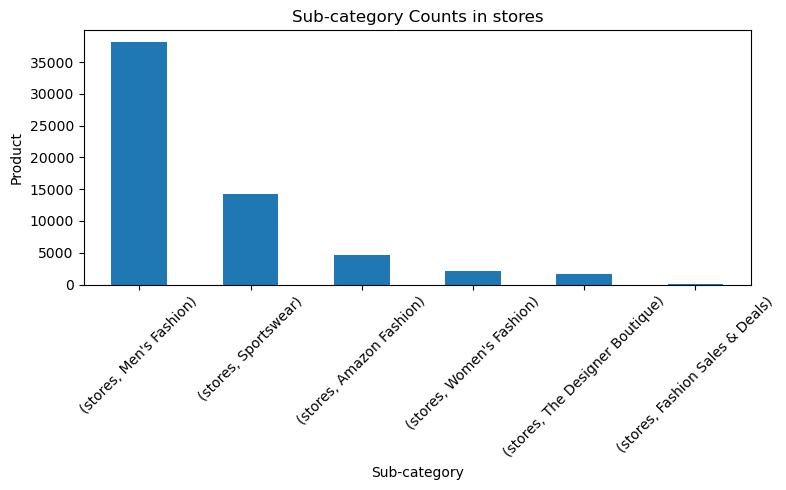

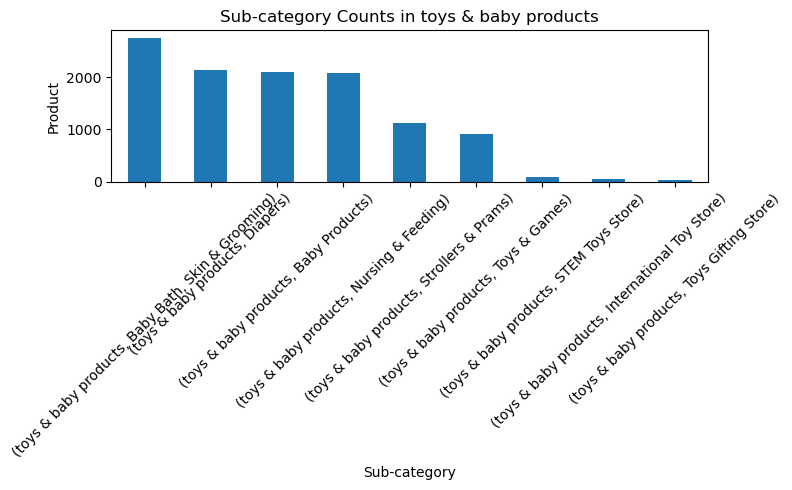

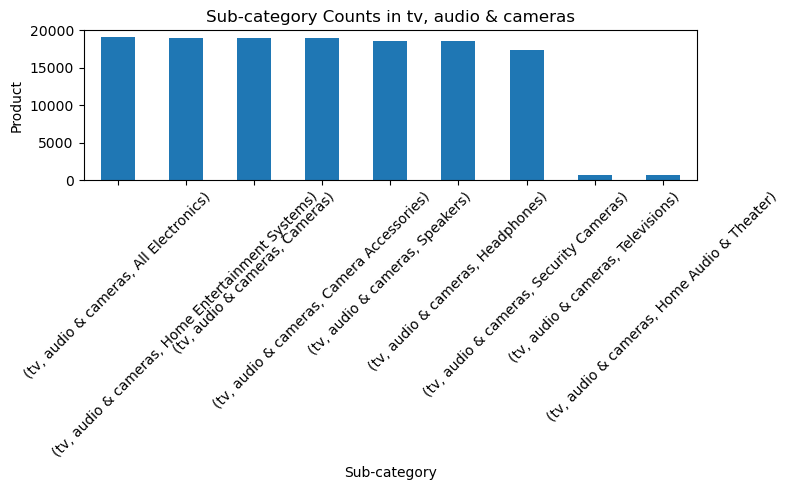

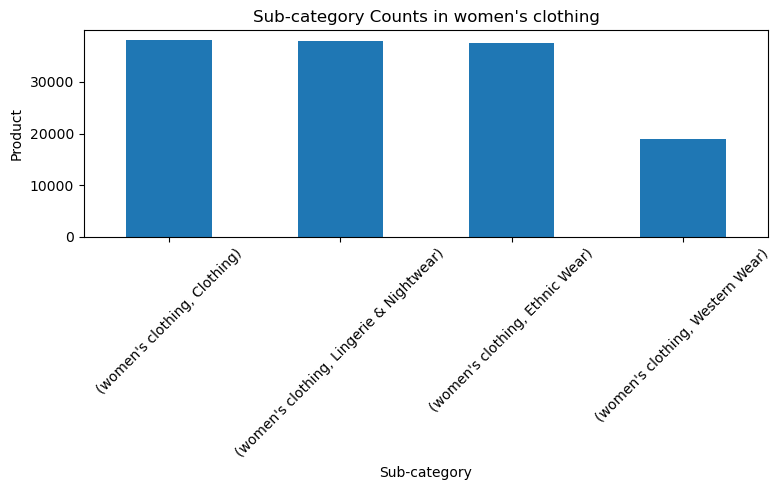

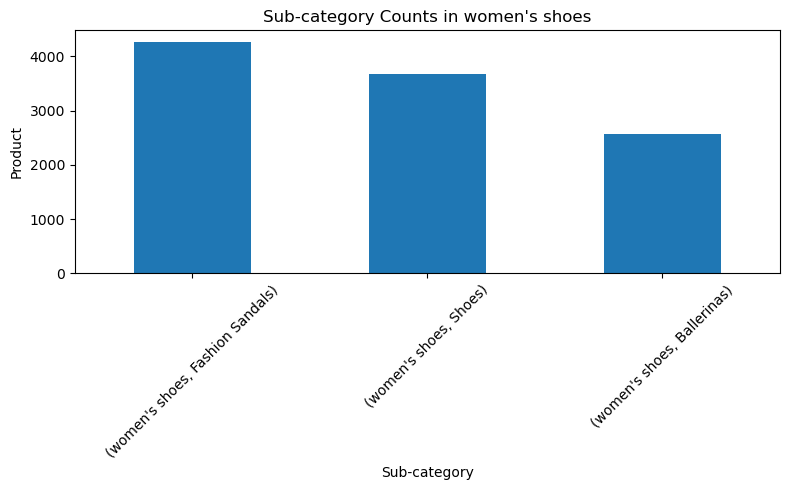

In [27]:


category_subcategory_counts = df.groupby('main_category')['sub_category'].value_counts()

for main_category, sub_category_count in category_subcategory_counts.groupby(level=0):
    plt.figure(figsize=(8, 5))
    sub_category_count.plot(kind='bar')
    plt.title(f"Sub-category Counts in {main_category}")
    plt.xlabel('Sub-category')
    plt.ylabel('Product')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
